In [76]:
# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

#### 1. Carga y estudio de la estructura del dataset

In [77]:
# Cargamos el dataset 
data = pd.read_csv('equipment_anomaly_data.csv')

In [78]:
# Mostramos cantidad total de registros y columnas
data.shape

# Guardamos la variable target
target = 'faulty'

In [79]:
# Mostramos el tipo de dato de cada columna
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB


In [80]:
# Decribimos las columnas numericas
data.describe()

,temperature,pressure,vibration,humidity,faulty
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000
mean,70.922478,35.738048,1.611809,50.016574,0.099974
std,16.200059,10.381593,0.728560,11.841479,0.299985
min,10.269385,3.620798,-0.428188,10.215077,0.000000
25%,62.777057,29.485682,1.170906,42.612817,0.000000
50%,70.156900,35.227544,1.533113,50.024744,0.000000
75%,77.568387,41.159913,1.924700,57.340513,0.000000
max,149.690420,79.887734,4.990537,89.984718,1.000000


In [81]:
# Mostramos los primeros y los ultimos 5 registros 
# Mostramos los primeros 5 registros
data.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


In [82]:
# Mostramos los últimos 5 registros
data.tail()

,temperature,pressure,vibration,humidity,equipment,location,faulty
7667,65.711521,37.505934,2.030521,49.331471,Pump,New York,0.0
7668,63.005855,45.164234,1.264585,61.905390,Pump,New York,0.0
7669,72.029230,34.757896,1.709046,49.972917,Pump,Atlanta,0.0
7670,107.086485,23.754114,1.142522,23.967977,Compressor,Atlanta,1.0
7671,28.468054,66.588978,4.677368,79.670225,Turbine,Chicago,1.0


#### 2. Limpieza de datos (data cleaning)

##### 2.1 Visualizacion de outliers mediante boxplots

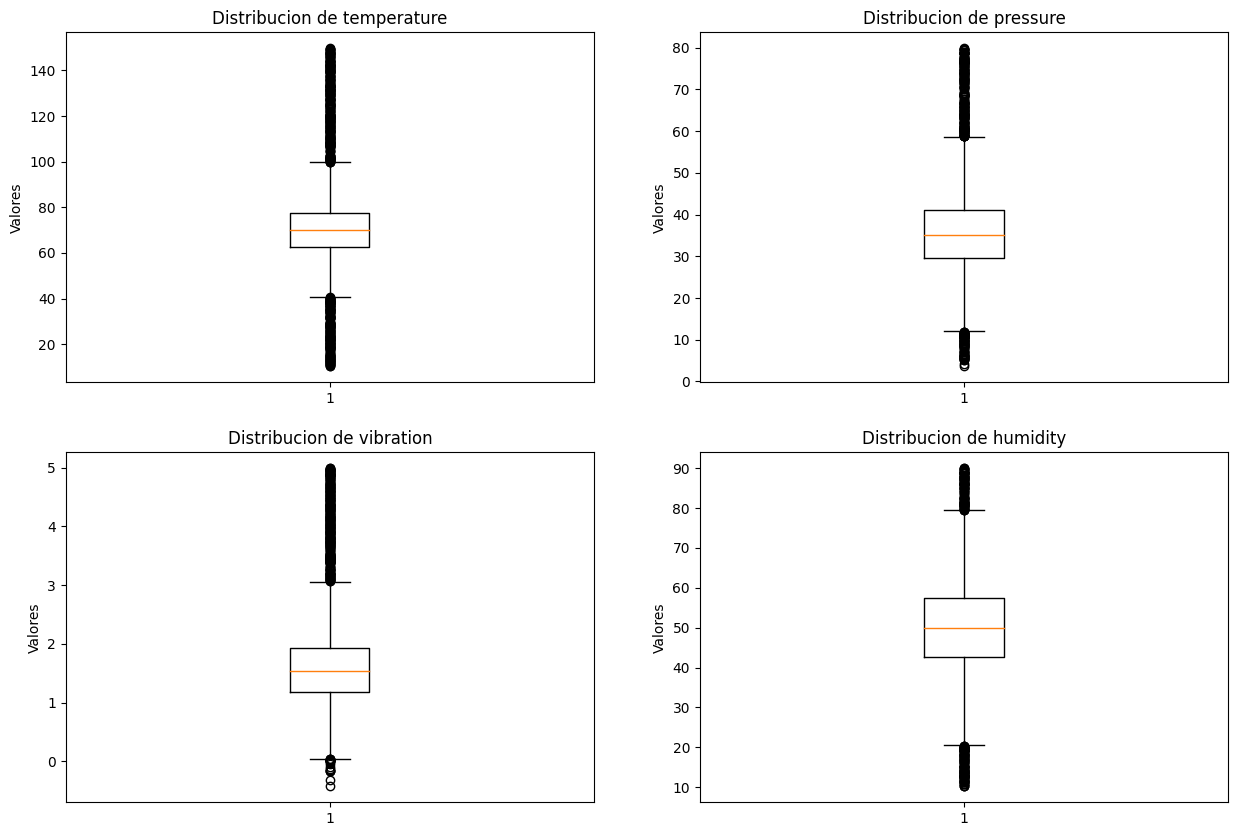

In [83]:
columnas_outliers = ['temperature','pressure','vibration','humidity']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

#Graficamos la distribucion de las variables numericas
for i, var in enumerate(columnas_outliers):
    axes[i].boxplot(data[var])
    axes[i].set_title(f"Distribucion de {var}")
    axes[i].set_ylabel("Valores")

for j in range(len(columnas_outliers), len(axes)):
    axes[j].axis('off')

plt.show()

#### 2.2 Eliminacion de outliers mediante la deteccion del rango intercuartilico

In [84]:
# Eliminacion de outliers mediante deteccion del rango intercuartilico
for col in columnas_outliers:
     # Calcular el primer y tercer cuartil
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    data_clean = data[(data[col]>= limite_inferior) & (data[col] <= limite_superior)]



print("Cantidad de datos antes de la limpieza:", data.shape[0])
print("Cantidad de datos despues de la limpieza:", data_clean.shape[0])

Cantidad de datos antes de la limpieza: 7672
Cantidad de datos despues de la limpieza: 7461


#### 2.4 Modificamos valores no numericos en numericos mediante tecnicas de remplazo

In [85]:
#Convertimos la columna target de float a int
data_clean[target] = data_clean[target].astype(int)
# Utilizos la tecnica One-Hot Encoding en las columnas equipment,location
data_encoded = pd.get_dummies(data_clean, columns=['equipment','location'], dtype=int)

#Verificamos que todas las columnas son numericas
print(data_encoded.info())
print(data_encoded.head())


<class 'pandas.core.frame.DataFrame'>
Index: 7461 entries, 0 to 7670
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temperature             7461 non-null   float64
 1   pressure                7461 non-null   float64
 2   vibration               7461 non-null   float64
 3   humidity                7461 non-null   float64
 4   faulty                  7461 non-null   int64  
 5   equipment_Compressor    7461 non-null   int64  
 6   equipment_Pump          7461 non-null   int64  
 7   equipment_Turbine       7461 non-null   int64  
 8   location_Atlanta        7461 non-null   int64  
 9   location_Chicago        7461 non-null   int64  
 10  location_Houston        7461 non-null   int64  
 11  location_New York       7461 non-null   int64  
 12  location_San Francisco  7461 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 816.0 KB
None
   temperature   pressure  vibration   humidit

/tmp/ipykernel_17328/3024820577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[target] = data_clean[target].astype(int)


#### ⚖ 3. Balanceo del dataset 

In [86]:
class_types = data_encoded[target].value_counts()
class_proportion = data_encoded[target].value_counts(normalize=True) * 100

print("Tipos de clases")
print(class_types)
print("Proporcion de clases")
print(round(class_proportion,2))


Tipos de clases
faulty
0    6886
1     575
Name: count, dtype: int64
Proporcion de clases
faulty
0    92.29
1     7.71
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribución de clases antes de balancear el dataset')

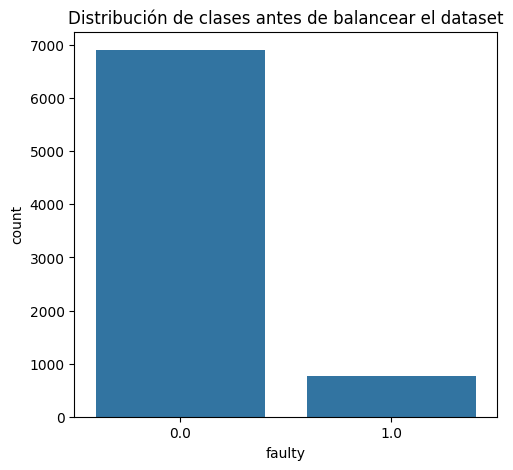

In [91]:
# Gráfico antes de SMOTE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=target, data=data)
plt.title('Distribución de clases antes de balancear el dataset')

#### Nota: Como podemos observar, existen un desbalanceo del dataset, que hace que los futuros datos que predigamos con nuestros modelos esten sesgado hacia una clase que es predominate en este caso la clase 0 (No existe fallo en la maquina), lo que predicciones erroneas.

In [100]:
# Usamos SMOTE para balancear el dataset con valores sinteticos
X = data_encoded.drop(columns=[target])
y = data_encoded[target]
smote = SMOTE(sampling_strategy='minority')
X_resampled, y_resampled = smote.fit_resample(X, y)

data_balanced = pd.DataFrame(X_resampled)
data_balanced[target] = y_resampled


# Comprobamos el numero de muestras despues de realizar el balanceo de clases
class_types_res = pd.Series(y_resampled).value_counts()
class_proportion = data_encoded[target].value_counts(normalize=True) * 100

print("Tipos de clases despues del balanceo")
print("Número de muestras despues del balanceo: ", len(X_resampled))
print("Tipos de clases despues del balanceo")
print(class_types_res)


Tipos de clases despues del balanceo
Número de muestras despues del balanceo:  13772
Tipos de clases despues del balanceo
faulty
0    6886
1    6886
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribución después de SMOTE')

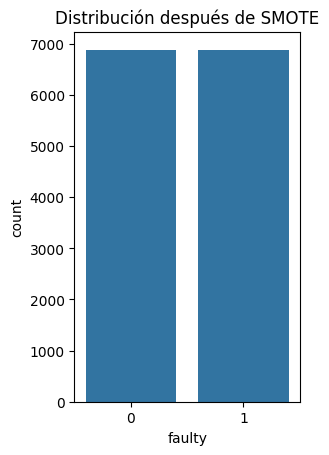

In [101]:
# Gráfico distribución de clases después de SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=target, data=data_balanced)
plt.title('Distribución después de SMOTE')

#### Como podemos ver el dataset ya esta balanceado, ahora procederemos a entrenar nuestra red neuronal 

#### 4. 🧠 Entrenamiento de la red neuronal